# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the datasets

df = pd.read_csv('..\\Data\\50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


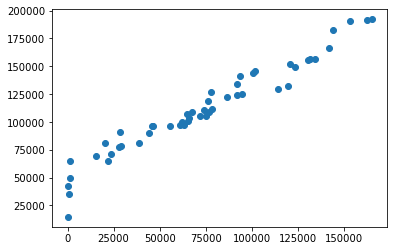

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['R&D Spend'],df['Profit'])

In [ ]:
df.columns

In [15]:
# X = df.iloc[:, :-1].values
# Y = df.iloc[:, 4].values

X = df[['R&D Spend', 'Administration', 'Marketing Spend']].values
Y = df[['Profit']].values

In [ ]:
# Encoding categorical data

In [ ]:
pd.get_dummies()

In [10]:
# # Encoding the Independent Variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

# onehotencoder = OneHotEncoder()
# X = onehotencoder.fit_transform(X).toarray()

In [ ]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [ ]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# le = LabelEncoder()
# X[:,3] = le.fit_transform(X[:,3])
# # df = df.drop(columns='State')
# sorted(df['State'].unique())
# df['State'] = le.fit_transform(df['State'])
# X1 = np.array(df['State']).reshape(-1,1)
# ohe = OneHotEncoder()
# ohe.fit_transform(X1).toarray()
# X = ohe.fit_transform(X).toarray()
# X

In [16]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
# Fitting the Multiple Linear Regression in the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [18]:
# Predicting the Train set results
from sklearn.metrics import r2_score

Y_Pred = regressor.predict(X_Train)
r2_score(Y_Train,Y_Pred)

0.9499572530324031

In [ ]:
y = ax1+bx2+cx3+d

In [19]:
# Predicting the Test set results
Y_Pred = regressor.predict(X_Test)
r2_score(Y_Test,Y_Pred)

0.9393955917820571

In [12]:
# Fitting the Multiple Linear Regression in the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

Y_Pred = regressor.predict(X)
r2_score(Y,Y_Pred)

0.9507459940683246

In [26]:
X = df[['R&D Spend']].values
Y = df[['Profit']].values

X = sm.add_constant(X)

In [27]:
import statsmodels.api as sm

result = sm.OLS(Y,X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           3.50e-32
Time:                        19:14:17   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [ ]:
X_Optimal = X[:, [0,1,2,3,4]]
regressor_OLS = sm.OLS(endog = Y, exog = X_Optimal).fit()
regressor_OLS.summary()

In [ ]:
X_Optimal = X[:, [0,1,2,4,5]]
regressor_OLS = sm.OLS(endog = Y, exog = X_Optimal).fit()
regressor_OLS.summary()

In [ ]:
X_Optimal = X[:, [0,1,4,5]]
regressor_OLS = sm.OLS(endog = Y, exog = X_Optimal).fit()
regressor_OLS.summary()

In [ ]:
X_Optimal = X[:, [0,1,4]]
regressor_OLS = sm.OLS(endog = Y, exog = X_Optimal).fit()
regressor_OLS.summary()

In [ ]:
# Fitting the Multiple Linear Regression in the Optimal Training set

X_Optimal_Train, X_Optimal_Test = train_test_split(X_Optimal,test_size = 0.2, random_state = 0)
regressor.fit(X_Optimal_Train, Y_Train)

In [ ]:
# Predicting the Optimal Test set results

Y_Optimal_Pred = regressor.predict(X_Optimal_Test)

In [ ]:
x2 -> [10,50] -> training 

x2 -> [70] -> test/deployment

In [ ]:
y = ax1 + bx2 + cx3 + d -> 95.1%

variance problem

bias-variance trade off

In [ ]:
y = ax1 + d -> 94.7%

In [ ]:
scaling -> min max scaler / standard scaler
categorical -> label encoding / one hot encoding 

In [ ]:
cut off

x1 - x50

x1 -> 75%
x1,x2 -> 78%
x1,x2,x3 -> 79%
x1,x2,x3,x4 -> 83%

x1, x2, x4 -> 83%

In [ ]:
feature_importance / variable screeing / predictor score

feature_selection -> regression -> stepwise regression (backward elimition / forward estimation)

regularization -> L1 & L2 ( Ridge & Lasso regression -> elasticNet regression)

feature_extraction